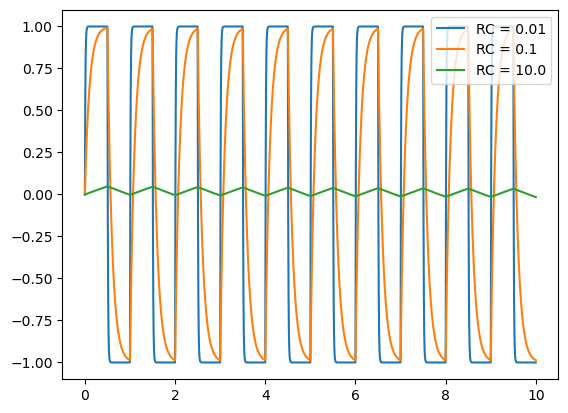

In [1]:
import numpy as np
import matplotlib.pyplot as mp
from scipy import floor

V_out = 0.0 # Initial condition
t_ini = 0.0 # initial time
t_fin = 10.0 # final time
N = 5000
h = (t_fin - t_ini)/N

def V_in(time):
    if np.floor(2*time) % 2 == 0:
        return 1
    else:
        return -1

def f(V, t, RC):
    return (1/RC) * (V_in(t) - V)

def g(RC):
    time = np.arange(t_ini , t_fin,h)
    Pot = []
    V = V_out
    for t in time:
        Pot.append(V)
        k1 = h*f(V,t,RC)
        k2 = h*f(V+0.5*k1,t+0.5*h,RC)
        k3 = h*f(V+0.5*k2,t+0.5*h,RC)
        k4 = h*f(V+k3,t+h,RC)
        V += (k1+2*k2+2*k3+k4)/6
    return Pot

time = np.arange(t_ini , t_fin,h)
mp.plot(time, g(0.01), label='RC = 0.01')
mp.plot(time, g(0.1), label='RC = 0.1')
mp.plot(time, g(10.0), label='RC = 10.0')
mp.legend()
mp.show()

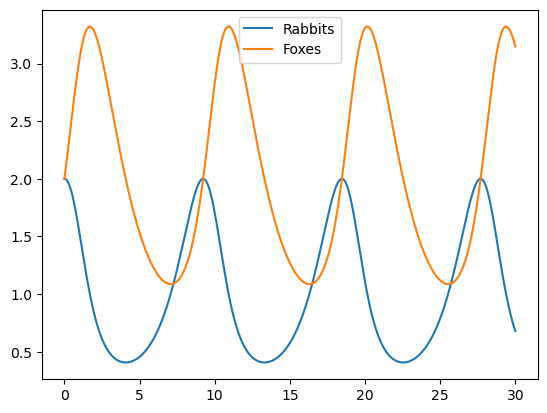

In [2]:
import numpy as np
import matplotlib.pyplot as mp

# initialize parameters
a = 1.0
b = 0.5
c = 0.5
d = 0.5
N=20000
t0,tf=0,30
h=(tf-t0)/N

# initialize populations
x_init = 2.0 #thousand
y_init = 2.0 #thousand


# Define population evolution
def f_x(x,y):
    return a*x - b*x*y
def f_y(x,y):
    return c*x*y - d*y

#Define population array function
def f(r):
    x = r[0]
    y = r[1]
    return np.array([ f_x(x,y), f_y(x,y) ], float)

#initialize the population array
r = np.array([x_init,y_init], float)

#rk4
time = np.arange(t0,tf,h)
xp, yp = [], []
for t in time:
    xp.append(r[0])
    yp.append(r[1])
    k1 = h*f(r)
    k2 = h*f(r+0.5*k1)
    k3 = h*f(r+0.5*k2)
    k4 = h*f(r+k3)
    r += (k1+2*k2+2*k3+k4)/6

mp.plot(time,xp, label='Rabbits')
mp.plot(time,yp, label='Foxes')
mp.legend()
mp.show()

C:\Users\think\AppData\Local\Temp\ipykernel_18640\4058573961.py:15: RuntimeWarning: overflow encountered in scalar multiply
  return 1- y*z
C:\Users\think\AppData\Local\Temp\ipykernel_18640\4058573961.py:19: RuntimeWarning: overflow encountered in scalar multiply
  return b*y + (1 - x*z)
C:\Users\think\AppData\Local\Temp\ipykernel_18640\4058573961.py:17: RuntimeWarning: invalid value encountered in scalar add
  return (1+x) + s*z + y


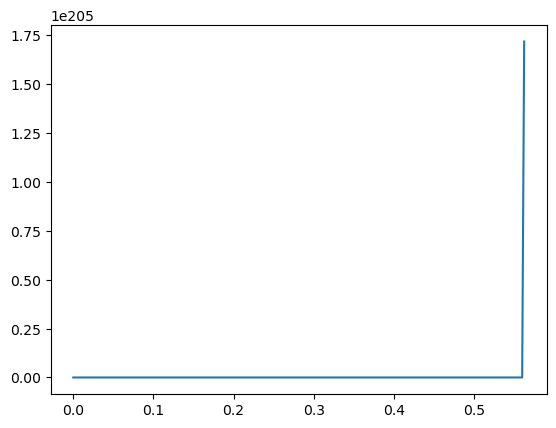

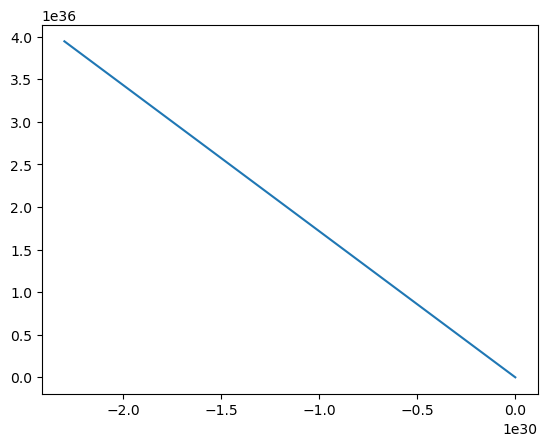

In [5]:
import numpy as np
import matplotlib.pyplot as mp

# initialize parameters
s, r, b = 10.0, 8, 8.0/3
t0, tf = 0.0, 50.0
N=20000
h=(tf-t0)/N

# Initialize  positions of a particle
xi, yi, zi = 1.0, 0.0, 1.0

# Define the position functions
def f_x(x,y,z):
    return 1- y*z
def f_y(x,y,z):
    return (1+x) + s*z + y
def f_z(x,y,z):
    return b*y + (1 - x*z)

# Define position array function
def f(w):
    x = w[0]
    y = w[1]
    z = w[2]
    return np.array([ f_x(x,y,z), f_y(x,y,z), f_z(x,y,z)], float)

# Initialize the position array
w = np.array([ xi, yi, zi], float)

# Make the RK4
time = np.arange(t0,tf,h)
xp, yp, zp = [], [], []
for t in time:
    xp.append(w[0])
    yp.append(w[1])
    zp.append(w[2])
    k1 = h*f(w)
    k2 = h*f(w+0.5*k1)
    k3 = h*f(w+0.5*k2)
    k4 = h*f(w+k3)
    w += (k1+2*k2+2*k3+k4)/6

mp.plot(time, yp)
mp.show()

mp.plot(xp,zp)
mp.show()

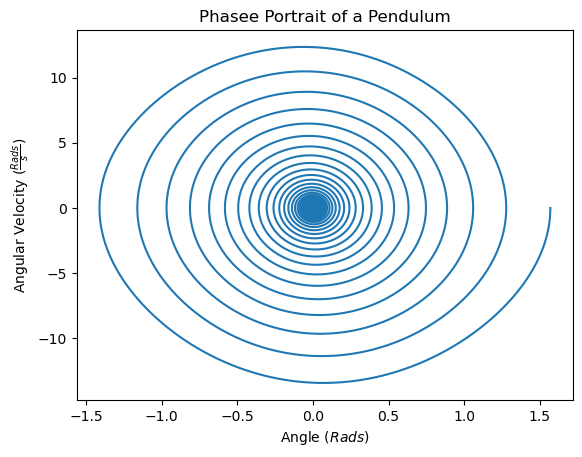

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [4]:
import numpy as np
import matplotlib.pyplot as mp
from vpython import cylinder, vector, sphere, rate

pi = 3.14159

g = 9.81 # m/s^2
l = 0.1 # length of the bar in meters
th0, om0 = (90 * pi)/180, 0.0  # initial angle in radians, initial angular velocity
t0, tf = 0.0, 20.0 # Initial time, Final time
N = 5000
h = (tf -t0)/N

# Driving coefficients O=driving frequency C= Driving amplitude
C, O=100.0, g/l

#Function defined in the textbook as the second order differential equation
def f(r,t):
    theta = r[0]
    omega = r[1]
    f_th = omega
    f_om = - (g/l) * np.sin(theta) -0.05*(omega + theta*t)/l
    return np.array ([f_th,f_om], float)

# initialize variables --------------------------------------------------

# initialize time array resposible for evolution
tp = np.arange(t0,tf,h)

# initialize parameters for the angle of the pendulum and the angular velocity
thp, omp = [], []

#initialize the position array:
r = np.array([th0,om0], float)
# RK4 algorithm
for t in tp:
    thp.append(r[0])
    omp.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

mp.title('Phasee Portrait of a Pendulum')
mp.plot(thp,omp)
mp.xlabel(r'Angle $(Rads)$')
mp.ylabel(r'Angular Velocity $(\frac{Rads}{s})$')
mp.show()

# make animation
rod = cylinder(pos=vector(0, 0, 0), axis=vector(l * np.cos(th0 - pi / 2), l * np.sin(th0 - pi / 2), 0), radius=l/40)
bob = sphere(pos=vector(l * np.cos(th0 - pi / 2), l * np.sin(th0 - pi / 2), 0), radius=l/10)
for theta in thp:
    rate(N // 10)
    rod.axis = vector(l * np.cos(theta - pi / 2), l * np.sin(theta - pi / 2), 0)
    bob.pos = vector(l * np.cos(theta - pi / 2), l * np.sin(theta - pi / 2), 0)

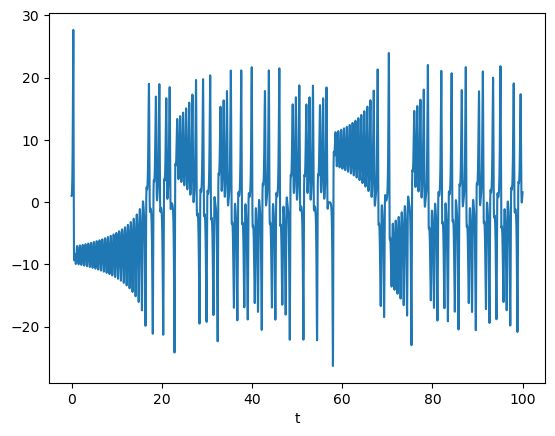

NameError: name 'ylabel' is not defined

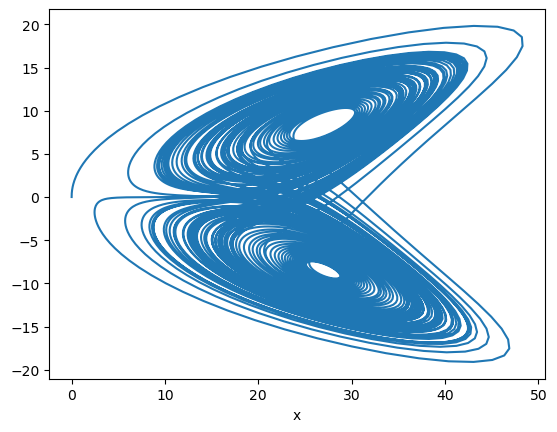

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 15 11:08:57 2013

@author: akels
"""
from __future__ import division, print_function
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,show


sigma_ = 10
r_=28
b_=8/3

def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma_*(y-x)
    fy = r_*x - y - x*z
    fz = x*y - b_*z
    return array([fx,fy,fz],float)

a = 0.0
b = 100.0
N = 10000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
zpoints = []

r = array([0,1,0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])				
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

#plot(tpoints,xpoints)
plot(tpoints,ypoints)
xlabel("t")
show()

plot(zpoints,xpoints)
xlabel('x')
ylabel('z')
show()

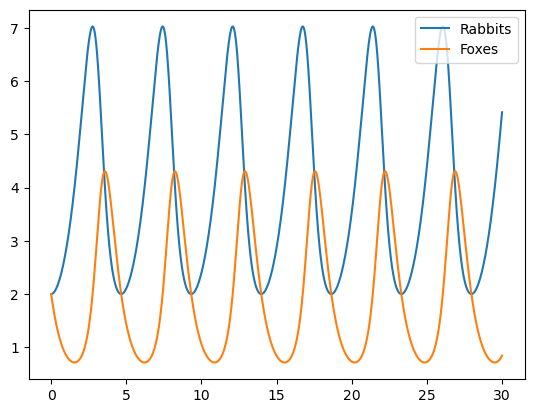

In [8]:
import numpy as np
import matplotlib.pyplot as mp

# initialize parameters
a = 1.0
b = 0.5
c = 0.5
d = 2
N=20000
t0,tf=0,30
h=(tf-t0)/N

# initialize populations
x_init = 2.0 #thousand
y_init = 2.0 #thousand


# Define population evolution
def f_x(x,y):
    return a*x - b*x*y
def f_y(x,y):
    return c*x*y - d*y

#Define population array function
def f(r):
    x = r[0]
    y = r[1]
    return np.array([ f_x(x,y), f_y(x,y) ], float)

#initialize the population array
r = np.array([x_init,y_init], float)

#rk4
time = np.arange(t0,tf,h)
xp, yp = [], []
for t in time:
    xp.append(r[0])
    yp.append(r[1])
    k1 = h*f(r)
    k2 = h*f(r+0.5*k1)
    k3 = h*f(r+0.5*k2)
    k4 = h*f(r+k3)
    r += (k1+2*k2+2*k3+k4)/6

mp.plot(time,xp, label='Rabbits')
mp.plot(time,yp, label='Foxes')
mp.legend()
mp.show()

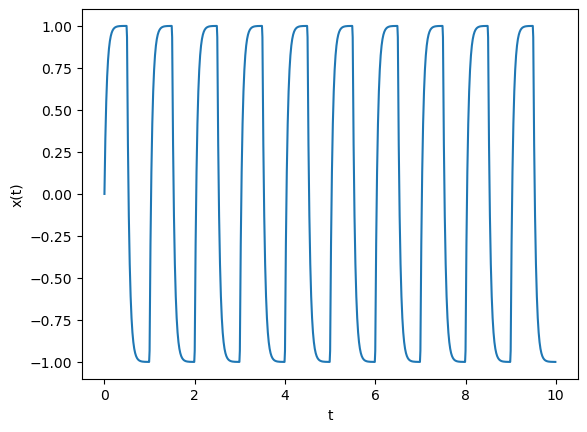

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 15 09:38:57 2013

@author: akels
"""
from __future__ import division, print_function

from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

RC = 0.05

def V_in(t):
	
	if int(2*t)%2==0:
		return 1
	else:
		return -1

def f(x,t):
    return (V_in(t) - x)/RC

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
x = 0.0

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()

NameError: name 'legend' is not defined

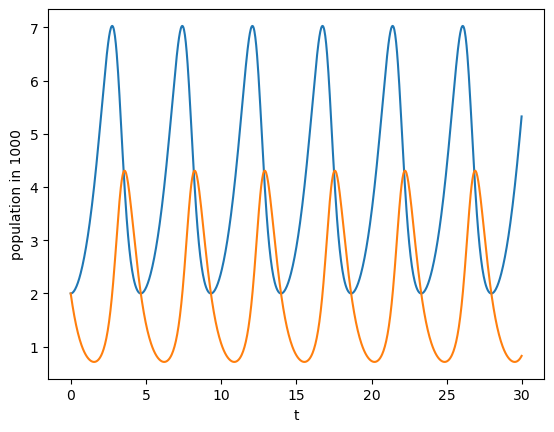

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 15 10:59:45 2013

@author: akels
"""
from __future__ import division, print_function

from math import sin
from numpy import array,arange
from pylab import plot,xlabel,show

alpha = 1
beta = 0.5
gamma = 0.5
delta = 2

def f(r,t):
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y-delta*y
    return array([fx,fy],float)

a = 0.0
b = 30.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([2.0,2.0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints,label='rabits')
plot(tpoints,ypoints,label='foxes')
xlabel("t")
ylabel('population in 1000')
legend()
show()

plot(xpoints,ypoints)
xlabel('rabits')
ylabel('foxes')
show()

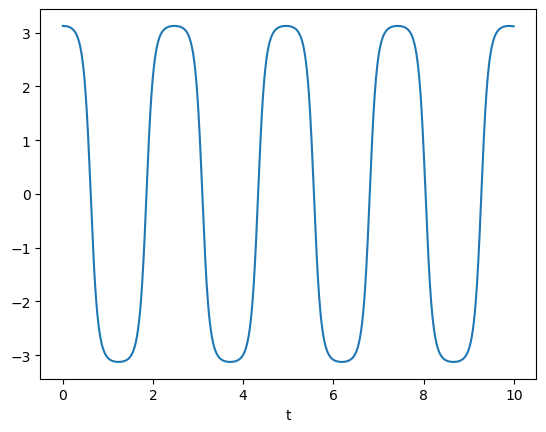

<IPython.core.display.Javascript object>

Position set to [0, -10, 0]


AttributeError: 'pendulum_theta' object has no attribute 'cylinder'

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 15 12:04:20 2013

@author: akels
"""
from __future__ import division, print_function
from math import sin,pi
from numpy import array,arange
from pylab import plot,xlabel,show

g = 9.81
l =0.1

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -g/l*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 10.0
N = 3000
h = (b-a)/N

tpoints = arange(a,b,h)
theta = []

r = array([179/180*pi,0],float)
for t in tpoints:
    theta.append(r[0])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,theta)
#plot(tpoints,ypoints)
xlabel("t")
show()


class pendulum_xyz:
	
	def __init__(self,length):
		
		from vpython import sphere, cylinder, box, color
		
		#self.pos = pos
		self.setpos([0,length,0]) 
		#d = display()
	
	#@property
	def getpos(self):
		print('Getting position')
		return self._pos
	
	#@pos.setter
	def setpos(self,pos):
		pos[1]=-pos[1]
		print('Position set to {}'.format(pos))
		self._pos = pos
		self.cylinder.axis = pos
		self.sphere.pos = pos
	
	#pos = property(getpos,setpos)

class pendulum_theta(pendulum_xyz):
	
	from cmath import exp
	
	#def __init__(self)
	
	def angle(self,theta):
		
		r = self.length*exp(1j*theta)
		self.setpos([r.imag,r.real,0])

	
p = pendulum_theta(10)

from vpython import rate

for t,angle in zip(tpoints,theta)[::10]:
	rate(30)
	#print('t={}\ttheta={}'.format(t,angle))
	p.angle(angle)

In [3]:
from __future__ import division, print_function
from math import sin,pi
from numpy import array,arange
from vpython import sphere, cylinder, vector, rate, color

g = 9.81
l =0.1

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -g/l*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 10.0
N = 3000
h = (b-a)/N

tpoints = arange(a,b,h)
theta_points = []

r = array([179/180*pi,0],float)
for t in tpoints:
    theta_points.append(r[0])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

class pendulum_xyz:
    def __init__(self,length):
        self.length = length
        self.sphere = sphere(pos=vector(0,-length,0), radius=length/10)
        self.cylinder = cylinder(pos=vector(0,0,0), axis=self.sphere.pos, radius=length/20)

    def setpos(self,pos):
        self.sphere.pos = vector(*pos)
        self.cylinder.axis = self.sphere.pos

class pendulum_theta(pendulum_xyz):
    def angle(self,theta):
        self.setpos([l*sin(theta), -l*cos(theta), 0])

p = pendulum_theta(l)

for angle in theta_points:
    rate(100)
    p.angle(angle)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

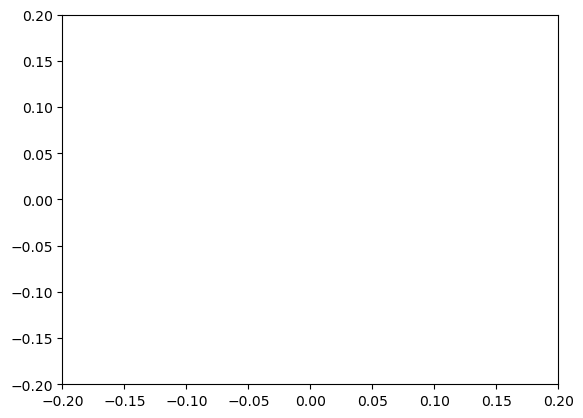

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
g = 9.81
l = 0.1
a = 0.0
b = 10.0
N = 3000
h = (b-a)/N

# Function for the pendulum
def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -g/l*np.sin(theta)
    return np.array([ftheta,fomega],float)

# RK4 method
r = np.array([179/180*np.pi,0],float)
theta_points = []
for t in np.arange(a,b,h):
    theta_points.append(r[0])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

# Animation
fig = plt.figure()
ax = plt.axes(xlim=(-l-0.1, l+0.1), ylim=(-l-0.1, l+0.1))
pend, = ax.plot([], [], 'o-', lw=2)

def init():
    pend.set_data([], [])
    return (pend,)

def animate(i):
    theta = theta_points[i]
    x = [0, l*np.sin(theta)]
    y = [0, -l*np.cos(theta)]
    pend.set_data(x, y)
    return (pend,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(theta_points), interval=20, blit=True)
plt.show()


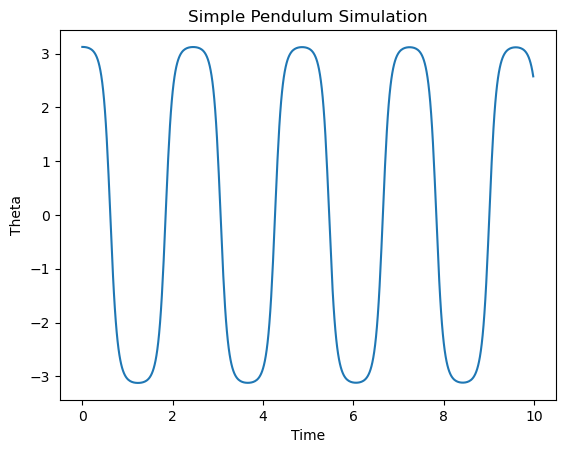

In [6]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
l = 0.1

def f(theta, omega, t):
    ftheta = omega
    fomega = -g/l * np.sin(theta)
    return ftheta, fomega

a = 0.0
b = 10.0
N = 500
h = (b - a) / N

tpoints = np.arange(a, b, h)
theta_points = []

theta, omega = 179/180 * np.pi, 0
for t in tpoints:
    theta_points.append(theta)
    k1_theta, k1_omega = f(theta, omega, t)
    k2_theta, k2_omega = f(theta + 0.5 * h * k1_theta, omega + 0.5 * h * k1_omega, t + 0.5 * h)
    k3_theta, k3_omega = f(theta + 0.5 * h * k2_theta, omega + 0.5 * h * k2_omega, t + 0.5 * h)
    k4_theta, k4_omega = f(theta + h * k3_theta, omega + h * k3_omega, t + h)
    
    theta += (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta) * h / 6
    omega += (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega) * h / 6

plt.plot(tpoints, theta_points)
plt.xlabel('Time')
plt.ylabel('Theta')
plt.title('Simple Pendulum Simulation')
plt.show()
